In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/index_calculate_2.xlsx',sheet_name='Sheet2')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Top_dia                       156 non-null    int64  
 1   Top_Shape                     156 non-null    float64
 2   Walk_C                        156 non-null    int64  
 3   Top_Charge                    156 non-null    float64
 4   Top_PSA                       156 non-null    float64
 5   S_log                         156 non-null    float64
 6   R_B_C                         156 non-null    int64  
 7   Wiener                        156 non-null    int64  
 8   Z1                            156 non-null    int64  
 9   Z2                            156 non-null    int64  
 10  Acid_Base                     156 non-null    int64  
 11  Arom_atic                     156 non-null    int64  
 12  Arom_atic_1                   156 non-null    int64  
 13  Atom_

In [ ]:
df.drop(['Tumour types'],axis=1,inplace=True)


In [ ]:
df['Lip_inski'].replace(True,1,inplace=True)
df['Lip_inski'].replace(False,0,inplace=True)
df['Lip_inski_1'].replace(True,1,inplace=True)
df['Lip_inski_1'].replace(False,0,inplace=True)

<ipython-input-6-ad5b651e0da5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lip_inski'].replace(True,1,inplace=True)
<ipython-input-6-ad5b651e0da5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Lip_inski'].replace(False,0,inplace=True)
<ipython-input-6-ad5b651e0da5>:3: FutureWarning: 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Top_dia                       156 non-null    int64  
 1   Top_Shape                     156 non-null    float64
 2   Walk_C                        156 non-null    int64  
 3   Top_Charge                    156 non-null    float64
 4   Top_PSA                       156 non-null    float64
 5   S_log                         156 non-null    float64
 6   R_B_C                         156 non-null    int64  
 7   Wiener                        156 non-null    int64  
 8   Z1                            156 non-null    int64  
 9   Z2                            156 non-null    int64  
 10  Acid_Base                     156 non-null    int64  
 11  Arom_atic                     156 non-null    int64  
 12  Arom_atic_1                   156 non-null    int64  
 13  Atom_

In [ ]:
df.head(1)

,Top_dia,Top_Shape,Walk_C,Top_Charge,Top_PSA,S_log,R_B_C,Wiener,Z1,Z2,...,Moe_Type_1,Moe_Type_2,Moe_Type_3,Moe_Type_4,Moe_Type_5,Path_Count,Polariz_ability,Polariz_ability_1,Ring_Count,MW
0,16,1.0,68,0.562857,171.17,3.5175,8,12104,354,458,...,39.044395,48.338655,9.636773,63.542637,23.687232,68,126.580408,72.295592,9,824.399644


In [ ]:
df.columns

Index(['Top_dia', 'Top_Shape', 'Walk_C', 'Top_Charge', 'Top_PSA', 'S_log',
       'R_B_C', 'Wiener', 'Z1', 'Z2', 'Acid_Base', 'Arom_atic', 'Arom_atic_1',
       'Atom_Count', 'Atom_Count_1', 'Atom_Count_2', 'Atom_Count_3',
       'Atom_Count_4', 'Atom_Count_5', 'Auto_correlation',
       'Auto_correlation_1', 'Auto_correlation_2', 'Auto_correlation_3',
       'Auto_correlation_4', 'Auto_correlation_5', 'Balaban_J', 'Bertz_CT',
       'Bond_Count', 'Carbon_Types', 'Constitu_tional', 'Constitu_tional_1',
       'Eccentric_Connectivity_Index', 'E_State', 'Fragment_Complexity',
       'Frame_work', 'Hydrogen_Bond', 'Hydrogen_Bond_1', 'Information_Content',
       'Information_Content_1', 'Information_Content_2',
       'Information_Content_4', 'Information_Content_5',
       'Information_Content_6', 'Lip_inski', 'Lip_inski_1', 'Log_S',
       'Mc_GowanVolume', 'Moe_Type', 'Moe_Type_1', 'Moe_Type_2', 'Moe_Type_3',
       'Moe_Type_4', 'Moe_Type_5', 'Path_Count', 'Polariz_ability',
       'P

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
# from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
df_cols=list(df.columns)
df_cols.remove('Top_PSA')

In [ ]:
df_cols

['Top_dia',
 'Top_Shape',
 'Walk_C',
 'Top_Charge',
 'S_log',
 'R_B_C',
 'Wiener',
 'Z1',
 'Z2',
 'Acid_Base',
 'Arom_atic',
 'Arom_atic_1',
 'Atom_Count',
 'Atom_Count_1',
 'Atom_Count_2',
 'Atom_Count_3',
 'Atom_Count_4',
 'Atom_Count_5',
 'Auto_correlation',
 'Auto_correlation_1',
 'Auto_correlation_2',
 'Auto_correlation_3',
 'Auto_correlation_4',
 'Auto_correlation_5',
 'Balaban_J',
 'Bertz_CT',
 'Bond_Count',
 'Carbon_Types',
 'Constitu_tional',
 'Constitu_tional_1',
 'Eccentric_Connectivity_Index',
 'E_State',
 'Fragment_Complexity',
 'Frame_work',
 'Hydrogen_Bond',
 'Hydrogen_Bond_1',
 'Information_Content',
 'Information_Content_1',
 'Information_Content_2',
 'Information_Content_4',
 'Information_Content_5',
 'Information_Content_6',
 'Lip_inski',
 'Lip_inski_1',
 'Log_S',
 'Mc_GowanVolume',
 'Moe_Type',
 'Moe_Type_1',
 'Moe_Type_2',
 'Moe_Type_3',
 'Moe_Type_4',
 'Moe_Type_5',
 'Path_Count',
 'Polariz_ability',
 'Polariz_ability_1',
 'Ring_Count',
 'MW']

In [ ]:
from sklearn.model_selection import train_test_split
# X=df.iloc[:,:-2]
X=df[df_cols]
# 'Top_PSA'
y=df['Top_PSA']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X.shape

(156, 57)

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_LRp=LR.predict(X_test)
LR_r2=r2_score(y_test,y_LRp)
LR_mse=mean_squared_error(y_test,y_LRp)
print('r2_score: ',LR_r2)
print('mse: ',LR_mse)

r2_score:  0.6351007247113021
mse:  3091.8789357572796


In [ ]:
LR.intercept_

np.float64(-54.438684243561966)

In [ ]:
# r2_score(y_train,LR.predict(X_train))

In [ ]:
LR_coef=LR.coef_
features=X.columns

# sns.scatterplot(x=features,y=LR_coef)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param={"alpha":[0.1,0.5,1.0,5.0]}

# grid_lasso=GridSearchCV(estimator=Lasso(),param_grid=param,scoring='r2',cv=5)


In [ ]:
# grid_lasso.fit(X,y)

In [ ]:
# grid_lasso.best_params_

In [ ]:
# param={"alpha":[0.1,0.5,1.0,5.0]}


Las=Lasso()
Las.fit(X_train,y_train)
y_Lasp=Las.predict(X_test)
Las_r2=r2_score(y_test,y_Lasp)
Las_mse=mean_squared_error(y_test,y_Lasp)
print('r2_score: ',Las_r2)
print('mse: ',Las_mse)

r2_score:  0.9824863364656674
mse:  148.3974648261534


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.469e+03, tolerance: 1.667e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# r2_score(y_train,LR.predict(X_train))

In [ ]:
Las_coef=Las.coef_
# Las_r2=

In [ ]:
Rid=Ridge(solver='cholesky')

Rid.fit(X_train,y_train)
y_Ridp=Rid.predict(X_test)
Rid_r2=r2_score(y_test,y_Ridp)
Rid_mse=mean_squared_error(y_test,y_Ridp)
print('r2_score: ',Rid_r2)
print('mse: ',Rid_mse)

r2_score:  0.9263803986788491
mse:  623.796510430519


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.06466e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
Rid_coef=Rid.coef_

In [ ]:
LR.intercept_,Las.intercept_,Rid.intercept_

(np.float64(-54.438684243561966),
 np.float64(12.16613790432774),
 np.float64(28.819803759889083))

In [ ]:
LR.rank_

52

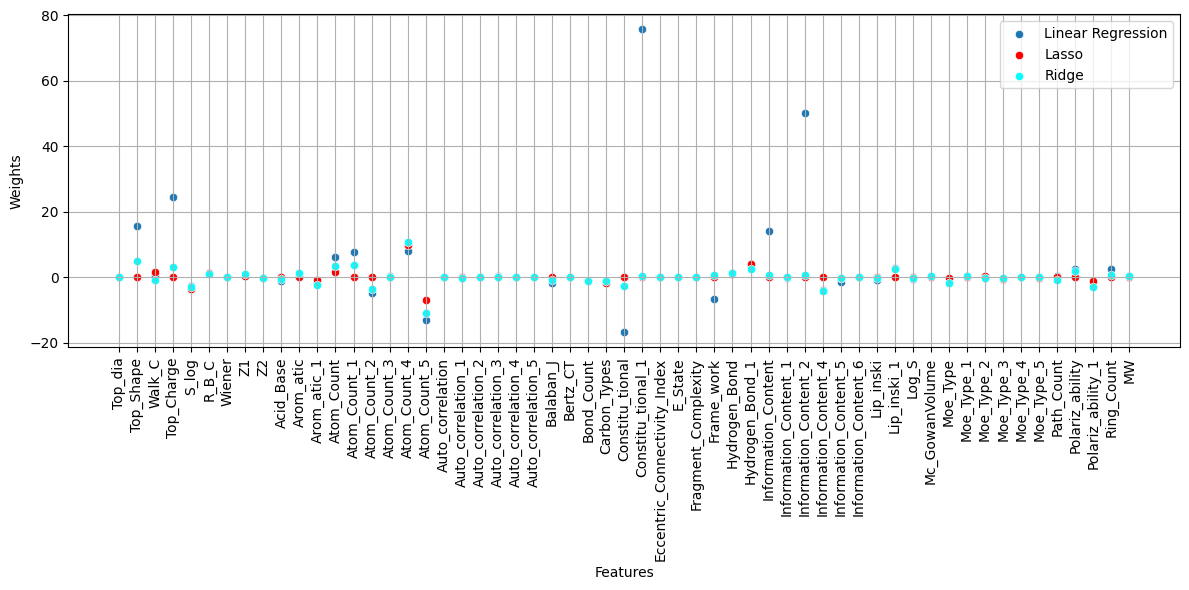

In [ ]:
plt.figure(figsize=(12,6))

sns.scatterplot(x=features,y=LR_coef,label='Linear Regression')
sns.scatterplot(x=features,y=Las_coef,label='Lasso',color='red')
sns.scatterplot(x=features,y=Rid_coef,label='Ridge',color='cyan')
# sns.scatterplot(x=features,y=DT_coef,label='Decision Tree')
# plt.axhline(0)
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Features')
plt.ylabel('Weights')
plt.grid()
plt.tight_layout()
plt.savefig('DFTM_weights.eps')
# plt.show()

In [ ]:
LR_r2,Las_r2,Rid_r2

(0.6351007247113021, 0.9824863364656674, 0.9263803986788491)

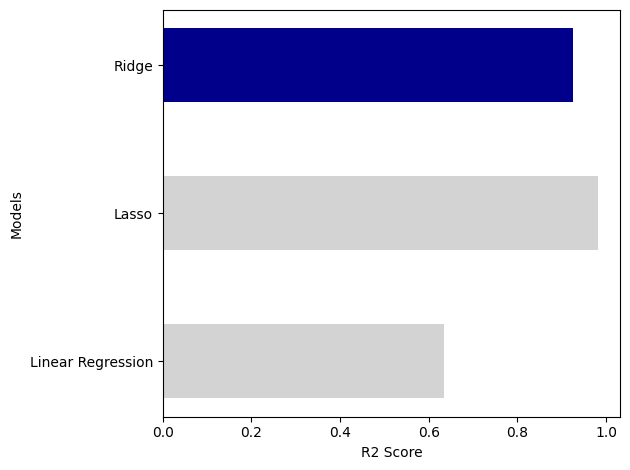

In [ ]:
plt.barh(y=['Linear Regression','Lasso','Ridge'],width=[LR_r2,Las_r2,Rid_r2],color=['lightgrey','lightgrey','darkblue'],height=0.5)
plt.xlabel('R2 Score')
plt.ylabel('Models')
# plt.grid()
plt.tight_layout()
# plt.savefig('Direct_r2score.eps')
plt.show()

In [ ]:
LR_mse,Las_mse,Rid_mse

(3091.8789357572796, 148.3974648261534, 623.796510430519)

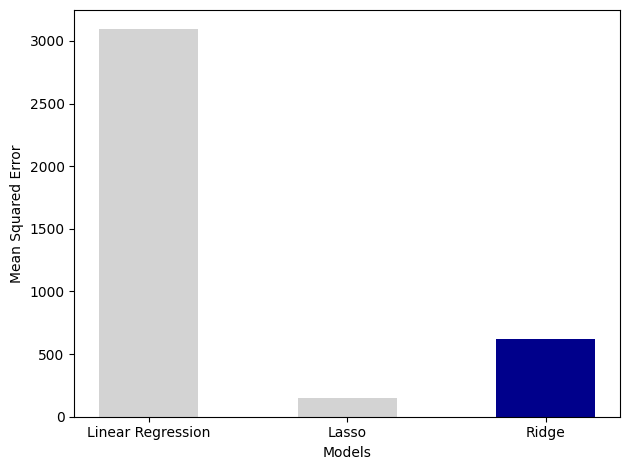

In [ ]:
plt.bar(x=['Linear Regression','Lasso','Ridge'],height=[LR_mse,Las_mse,Rid_mse],color=['lightgrey','lightgrey','darkblue'],width=0.5)
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
plt.tight_layout()
# plt.savefig('Direct_mse.eps')
plt.show()

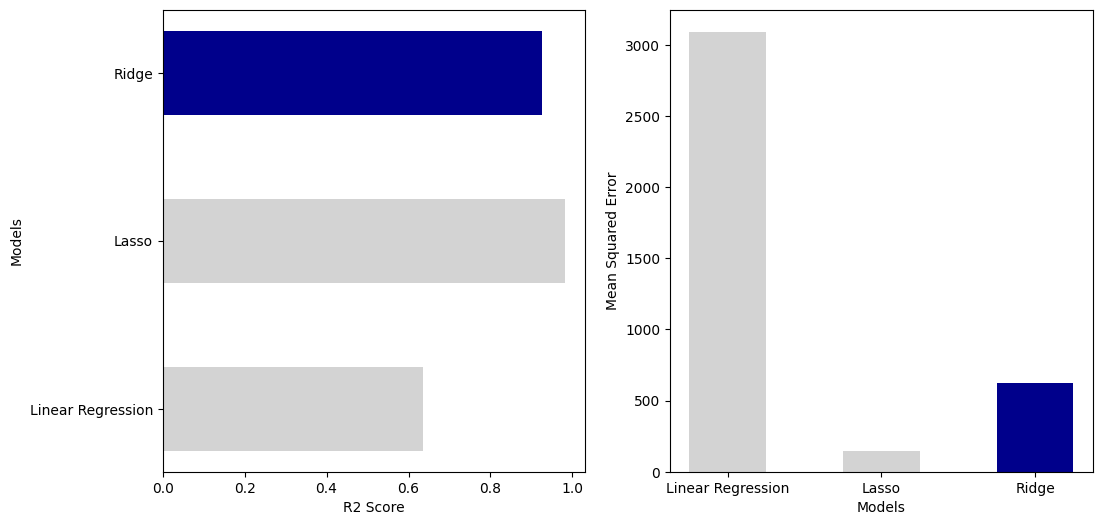

In [ ]:
# fig,axs=plt.subplots(2)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.barh(y=['Linear Regression','Lasso','Ridge'],width=[LR_r2,Las_r2,Rid_r2],color=['lightgrey','lightgrey','darkblue'],height=0.5)
plt.xlabel('R2 Score')
plt.ylabel('Models')
# plt.grid()
# plt.tight_layout()
# plt.savefig('Direct_r2score.eps')
# plt.show()
plt.subplot(1,2,2)
plt.bar(x=['Linear Regression','Lasso','Ridge'],height=[LR_mse,Las_mse,Rid_mse],color=['lightgrey','lightgrey','darkblue'],width=0.5)
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
plt.savefig('DFTM_r2mse.eps')
# plt.show()
# plt.tight_layout()
# plt.savefig('Direct_mse.eps')
# plt.show()

In [ ]:
df_weights=pd.DataFrame({
    'Features':features,
    'Linear Regression':LR.coef_,
    'Lasso':Las.coef_,
    'Ridge':Rid.coef_
})
df_weights

,Features,Linear Regression,Lasso,Ridge
0,Top_dia,1.527709e-07,2.282681e-08,7.451919e-08
1,Top_Shape,1.574535e+01,-0.000000e+00,4.791601e+00
2,Walk_C,2.446223e-01,1.614522e+00,-1.020581e+00
3,Top_Charge,2.449824e+01,0.000000e+00,2.968000e+00
4,S_log,-2.585856e+00,-3.742873e+00,-2.912392e+00
5,R_B_C,8.879381e-01,1.348201e+00,1.031070e+00
6,Wiener,2.450697e-11,1.292132e-10,3.190556e-11
7,Z1,3.137746e-01,4.708197e-01,9.952846e-01
8,Z2,-1.790942e-01,-2.029734e-01,-3.506103e-01
9,Acid_Base,-1.160322e+00,-0.000000e+00,-6.824493e-01


In [ ]:
for i in df_weights.columns:
  if i!='Features':
    print(f"{i}: {df_weights.sort_values(i,ascending=False).head(1)['Features'].values}")

Linear Regression: ['Constitu_tional_1']
Lasso: ['Atom_Count_4']
Ridge: ['Atom_Count_4']


In [ ]:
df_weights.sort_values(i,ascending=False).head(1)['Features']

,Features
16,Atom_Count_4
